In [2]:
using Plots
using LaTeXStrings

# Problem 1

# Problem 2

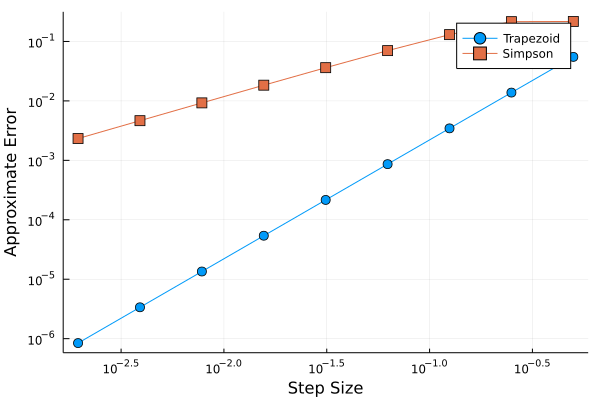

In [6]:
f(t) = sqrt(2 + cos(t)^3)*exp(sin(t))
function CompTrapezoid(N, a, b, f)

    #=
        Integrates f(t) from a to b using composite trapezoid rule

        Input variables
        N: number of points
        a: initial point
        b: final point
        f: function to be integrated

        local variables
        h: step size
        s: solution
    =#

    h = (b-a)/N
    s = 0
    for i = 1:N
        s += h/2 * (f(a + h*(i-1)) + f(a + h*i))
    end
    return s
end

function CompSimpson(N, a, b, f)

    #=
        Integrates f(t) from a to b using composite simpsons rule

        Input variables
        N: number of points
        a: initial point
        b: final point
        f: function to be integrated

        local variables
        h: step size
        s: solution
        ts: partition points
    =#

    h = (b-a)/N
    s = f(a) + f(b)

    ts = a:h:b
    for i = 1:(Int(N/2) - 1)
       s += 2*f(ts[2*i])
    end
    for i = 1:Int(N/2)
        s += 4*f(ts[2*i-1])
    end

    s = h/3 * s
    return s
end

a = 1; b = 3; #= N = 2^(10); =# T = b-a;

# CompTrapezoid(N,a,b,f)
# CompSimpson(N,a,b,f)

# Plotting error routine
NList = 2 .^(2:10)
errTrapeList = zeros(size(NList))
errSimpList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]

    utrape = CompTrapezoid(N,a,b,f)
    utexact = CompTrapezoid(2*N,a,b,f)

    usimps = CompSimpson(N,a,b,f)
    usexact = CompSimpson(2*N,a,b,f)

    # errTrapeList[i] = norm(utrape-uexact)
    errTrapeList[i] = abs(utrape-utexact)./(1-(1/2^2))
    errSimpList[i] = abs(usimps-usexact)./(1-(1/2^4))
end

plot(T./NList, errTrapeList,label="Trapezoid",xaxis=:log,yaxis=:log, marker = (:dot,5), add_marker = true)
plot!(T./NList, errSimpList,label="Simpson",xaxis=:log,yaxis=:log, marker = (:square,5), add_marker = true)
xlabel!("Step Size")
ylabel!("Approximate Error")
# ylabel!(L"\frac{f_n-f_{n/2}}{1-\frac{1}{2^2}}")
# ylabel!(L"||f-f^*||_2")

# slopeTrape = -(log(errTrapeList[end])-log(errTrapeList[1])) / 
# (log(NList[end]) - log(NList[1]))